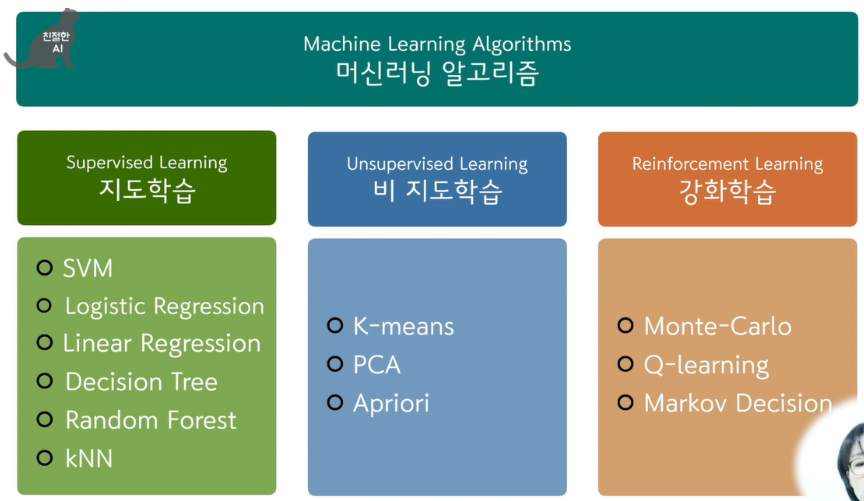

### 1) Unsupervised learning의 한 분야인 군집 분석(clustering analysis)을 살펴보자.
### 2) Clustering analysis을 사용하면, 정답을 모르는 데이터 안에서 숨겨진 구조를 찾을 수 있다.
### 3) 같은 클러스터 안 아이템이 다른 클러스터 아이템보다 더 비슷해지도록 데이터에 있는 자연스런 그룹을 찾는다.
### 4) 군집 종류
    a) 프로토타입 기반 군집: 각 클러스터가 하나의 프로토 타입(센트로이드: 평균 / 메도이드: 대표)
    b) 계층적 군집
    c) 밀집도 기반 군집
### 4) KMeans(프로토타입 기반)은 구현하기 쉽고, 계산 효율성이 높다. 단점: 사전에 클러스터 개수 지정 필요
    a) 사전에 최적의 클러스터 개수 결정: 엘보우 방법, 실루엣 그래프

# 타깃을 모르는 비지도 학습

In [41]:
## wget 백그라운드에서 작동할 수 있는 URL 네트워크 다운로더로, 
## 메인 서버에서 직접 파일을 다운로드 가능.
import wget
url = 'https://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [2]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)
## 첫번째 차원(300)은 샘플의 갯수
## 두번째 차원(100)은 이미지 높이
## 세번째 차원(100)은 이미지 너비, 즉 이미지 크기는 100 x100

(300, 100, 100)


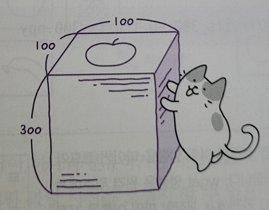

In [43]:
## 첫번째 이미지의 첫 번째 행 출력
print(fruits[0, 0, :])
print(len(fruits[0, 0, :]))

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
100


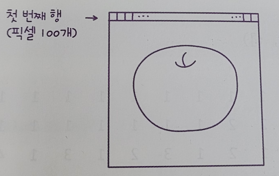

## 넘파이 배열은 흑백 사진을 담고 있으므로, 0~255까지 정수값

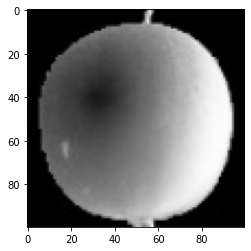

In [6]:
import matplotlib.pyplot as plt
plt.imshow(fruits[0], cmap='gray')
plt.show()

>1) 보통 흑백 샘플 이미지는 바탕이 밝고, 물체가 짙은색

>2) 주변 이미지가 어두운 이유 => 넘파이 배열로 변환할 때 반전.(흰색이 255으로 표현되기에 바탕에 집중하는 것을 막는다.)

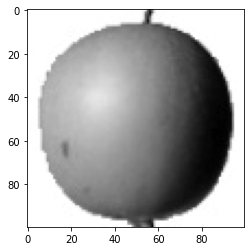

In [45]:
## 우리 눈에 보기 좋게 출력, 바탕을 밝게 출력하기.
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

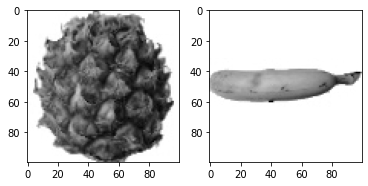

In [46]:
fig, axs = plt.subplots(1, 2)                 ## 하나의 행과 두개의 열을 지정.
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀값 분석하기
>1) 100 x 100 이미지를 펼쳐서 길이가 10000인 1차원 배열로 생성. => 배열을 계산 시, 편리.
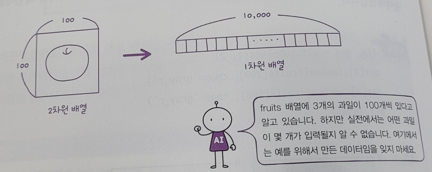

In [4]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)                               ## apple, pineapple, banana 배열의 크기(100, 10000)

(100, 10000)


### 샘플의 픽셀 평균값 계산.

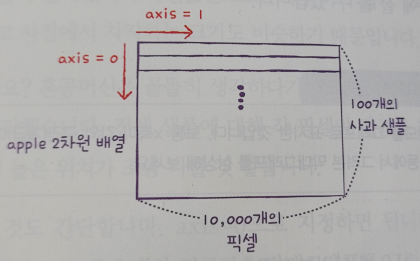

In [48]:
## axis = 1일 경우, 100개 샘플의 각 평균값을 추출 가능.
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


### 히스토그램을 그려보자. => 평균값이 어떻게 분포되어 있는지 파악.

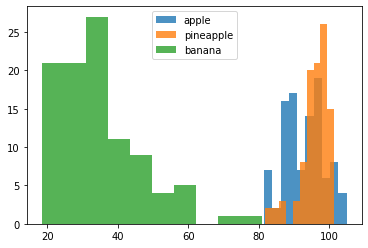

In [49]:
## 겹쳐서 그리기 => 투명하게 해야 겹친 부분을 잘 볼수 있어 alpha를 1보다 작게 set-up
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

>1) 바나나 사진의 평균 40 아래 분포 => 바나나 사진에서 차지하는 영역이 작다.

>2) 파인애플, 사과는 모양이 비슷하여 구분이 힘들다.

### 픽셀별 평균값 비교하여 분석

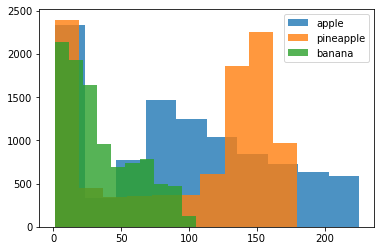

In [50]:
plt.hist(np.mean(apple, axis=0), alpha=0.8)
plt.hist(np.mean(pineapple, axis=0), alpha=0.8)
plt.hist(np.mean(banana, axis=0), alpha=0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

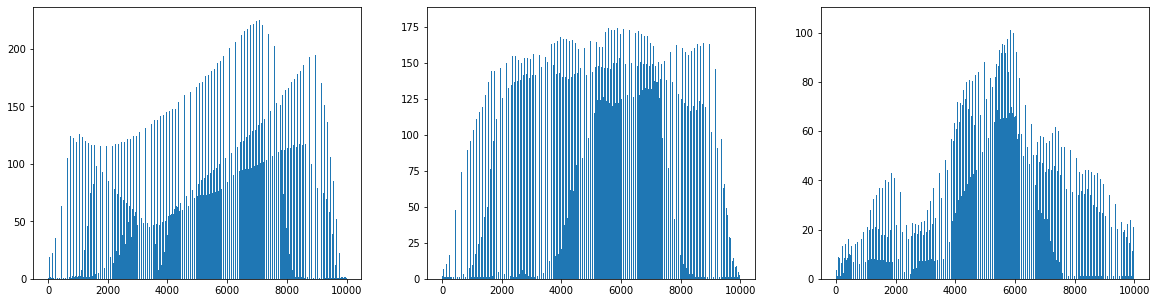

In [51]:
## 평균값을 막대 그래프로 표현 // 시간 겁내 걸림.
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

## 픽셀 평균값을 100x100크기로 변경하여 이미지로 출력.
## 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지.

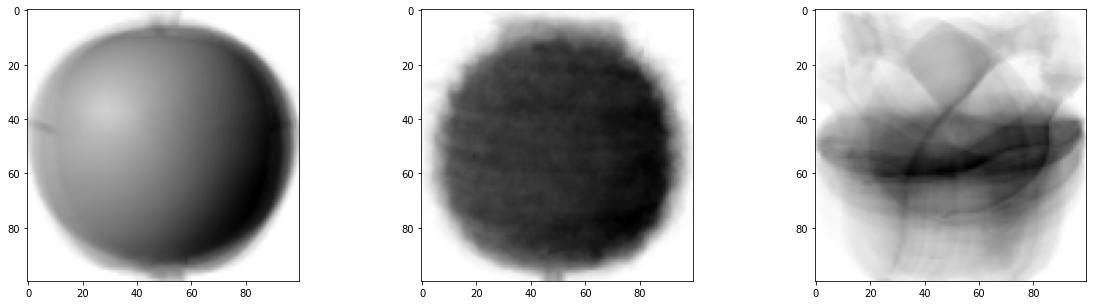

In [7]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기

In [16]:
## fruits: (300, 100, 100) // apple_mean: (100, 100)
print('fruits 형태:', fruits.shape, 'apple_mean 형태:', apple_mean.shape)

abs_diff = np.abs(fruits - apple_mean)
print(abs_diff.shape)

## 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세번째 차원을 모두 지정.
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

fruits 형태: (300, 100, 100) apple_mean 형태: (100, 100)
(300, 100, 100)
(300,)


### abs_mean값이 가장 작은 순서대로 100개 고르기

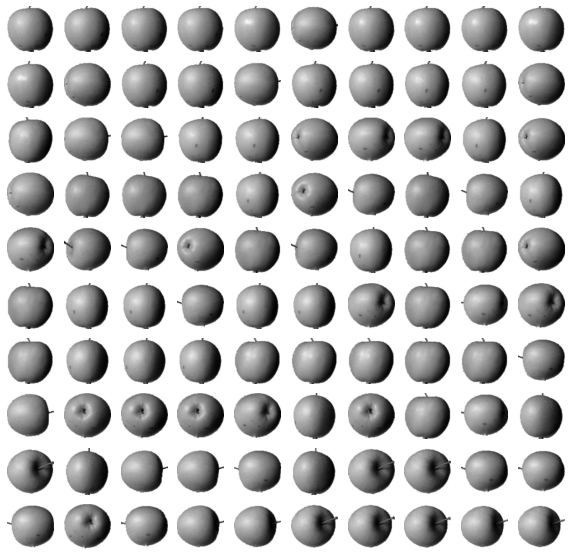

In [17]:
## argsort => 작은 것부터 큰 순서대로 나열한 인덱스 반환
apple_index = np.argsort(abs_mean)[0:100]

fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        ## 깔끔한 이미지만 그리기 위해 axis('off')
        axs[i, j].axis('off')                
plt.show()